In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv


In [29]:
df = pd.read_csv('/kaggle/input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv')

In [30]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [31]:
df['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

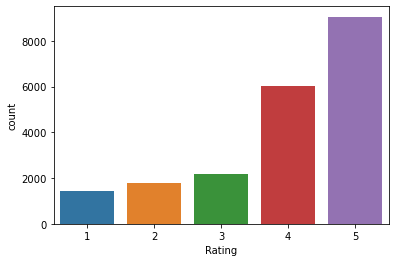

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df.Rating)

In [33]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                   "can't've": "cannot have", "'cause": "because", "could've": "could have", 
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
                   "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                   "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                   "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                       "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have" } 

In [34]:
dataset = df['Review'].str.lower()
dataset = dataset.to_list()

In [35]:
for i in range(len(dataset)):
    dataset[i] = [contraction_mapping[word] if word in contraction_mapping.keys() else word  for word in dataset[i].split(' ')]

In [36]:
dataset = [[word for word in i if word!=''] for i in dataset]

In [37]:
len_sum = sum(map(lambda i : len(i), dataset)) 
avg_len = (len_sum)/len(dataset)
print(avg_len)

104.3750427016739


In [38]:
maximum = len(dataset[0])
for i in dataset:
    if len(i) > maximum:
        maximum = len(i)
        sentence = i

print(maximum)
print(sentence)

minimum = len(dataset[0])
for i in dataset:
    if len(i) < minimum:
        minimum = len(i)
        sentence = i

print(minimum)
print(sentence)

1931
['honest', 'review', 'visit', '5/21-5/28', 'let', 'begin', 'saying', 'heard', 'secrets', 'couple', 'work', 'went', 'resort', 'year', 'returned', 'raving', 'experiences,', 'all-inclusive', 'regular', 'cruise', 'traveler', 'past', '4', 'years', 'decided', 'based', 'word-of-mouth', 'secrets', 'place', 'try.i', 'read', 'posts', 'site', 'daily,', 'review', 'written', 'resort', 'scoured', 'eyes,', 'reviews', 'gotten', 'good', 'suspected', 'staff', 'secrets', 'writing,', 'fact', 'person', 'posted', 'review', 'claimed', 'saw', 'staff', 'members', 'reading', 'posting', 'forum,', 'ca', "n't", 'say', 'stay', 'excellence', 'club', 'saw', 'type', 'activity', 'going', 'wo', "n't", 'past', 'hotel', 'ratings', 'high', 'posting', 'positive', 'reviews.in', 'case', 'read', 'totally', 'honest', 'review', 'secrets', 'felt', 'all-inclusive', 'experience,', 'end', 'review', 'include', 'link', 'photo', 'page', 'think', 'enjoy.i', 'booked', 'trip', 'judy', 'maria', 'travel', 'internet,', 'no', 'travel', '

In [39]:
for i in range(len(dataset)):
    dataset[i] = ' '.join(dataset[i])

In [40]:
import string

PUNCTUATIONS = string.punctuation
dataset = [each.translate(str.maketrans('', '', PUNCTUATIONS)) for each in dataset]

In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y = le.fit_transform(df.Rating)
Y = Y.reshape(-1,1)

In [42]:
X = dataset

In [43]:
from sklearn.model_selection import train_test_split

X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0, stratify=Y)

In [44]:
print(len(X_train))

16392


In [45]:
print(Y_train)

[[4]
 [4]
 [3]
 ...
 [1]
 [4]
 [0]]


In [46]:
from keras.utils import to_categorical
Y_train_one_hot_labels = to_categorical(Y_train)

In [47]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

max_words = 5000
max_len = 150
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [48]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Conv1D, GlobalMaxPooling1D
from keras.optimizers import Adam

inputs = Input(name='inputs',shape=[max_len])
layer = Embedding(max_words,50,input_length=max_len)(inputs)
layer = Conv1D(128, 5, activation='relu')(layer)
layer = LSTM(128)(layer)
layer = Dense(128, name='FC1')(layer)
layer = Dropout(0.1)(layer)
layer = Dense(64, name='FC2')(layer)
layer = Dense(5, name='out_layer')(layer)
layer = Activation('softmax')(layer)
model = Model(inputs=inputs,outputs=layer)
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 150, 50)           250000    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 146, 128)          32128     
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               131584    
_________________________________________________________________
FC1 (Dense)                  (None, 100)               12900     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
FC2 (Dense)                  (None, 10)               

In [50]:
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

model.fit(sequences_matrix,Y_train_one_hot_labels,batch_size=128,epochs=5,
          validation_split=0.1)

Epoch 1/5
116/116 [==============================] - 43s 368ms/step - loss: 0.0372 - accuracy: 0.9890 - val_loss: 4.2471 - val_accuracy: 0.5488
Epoch 2/5
116/116 [==============================] - 42s 365ms/step - loss: 0.0288 - accuracy: 0.9917 - val_loss: 4.4812 - val_accuracy: 0.5518
Epoch 3/5
116/116 [==============================] - 42s 364ms/step - loss: 0.0356 - accuracy: 0.9905 - val_loss: 4.4479 - val_accuracy: 0.5305
Epoch 4/5
116/116 [==============================] - 43s 369ms/step - loss: 0.0470 - accuracy: 0.9877 - val_loss: 4.3077 - val_accuracy: 0.5518
Epoch 5/5
116/116 [==============================] - 43s 371ms/step - loss: 0.0359 - accuracy: 0.9879 - val_loss: 4.5807 - val_accuracy: 0.5433


In [ ]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
Y_test_one_hot_labels = to_categorical(Y_test)
accr = model.evaluate(test_sequences_matrix,Y_test_one_hot_labels)

In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))